# OLA Ensemble Learning Case


## Problem Statement
Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)


In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
print(f'Rows in datset : {df.shape[0]}')
print(f'Columns in dataset : {df.shape[1]}')

Rows in datset : 19104
Columns in dataset : 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


Column Profiling:
1. MMMM-YY: Reporting month and year.
2. Driver_ID: A unique identifier for every driver.
3. Age: Age of the driver.
4. Gender: Driver's gender. Male: 0, Female: 1.
5. City: City code representing the city the driver operates in.
6. Education_Level: Education level of the driver, categorized into 0 for 10+, 1 for
12+, and 2 for graduate.
7. Income: Average monthly income of the driver.
8. Date Of Joining: The date when the driver joined Ola.
9. LastWorkingDate: The most recent or final day the driver worked with Ola.
10.Joining Designation: Designation of the driver at the onset of their journey with
Ola.
11. Grade: A grade assigned to the driver at the reporting time, likely denoting
performance or other metrics.
12.Total Business Value: The total monetary value (business) a driver brings in a
month. Negative values might indicate cancellations, refunds, or other financial
adjustments.
13.Quarterly Rating: Rating assigned to drivers on a quarterly basis. Ratings range
from 1 to 5, with 5 being the best.

In [ ]:
# Checking for null values
df.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
# Checking for duplicates
np.any(df.duplicated())

False

In [ ]:
# Statistical Analysis of the data

df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
for col in df.columns:
  print(f'Unique vals for {col} : {df[col].nunique()} --> {df[col].dtype}')

Unique vals for Unnamed: 0 : 19104 --> int64
Unique vals for MMM-YY : 24 --> object
Unique vals for Driver_ID : 2381 --> int64
Unique vals for Age : 36 --> float64
Unique vals for Gender : 2 --> float64
Unique vals for City : 29 --> object
Unique vals for Education_Level : 3 --> int64
Unique vals for Income : 2383 --> int64
Unique vals for Dateofjoining : 869 --> object
Unique vals for LastWorkingDate : 493 --> object
Unique vals for Joining Designation : 5 --> int64
Unique vals for Grade : 5 --> int64
Unique vals for Total Business Value : 10181 --> int64
Unique vals for Quarterly Rating : 4 --> int64


In [ ]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
# Changing datatype of date columns
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

## Feature Engineering

In [ ]:
ola = df.copy(deep=True)

In [ ]:
# Creating 'Target' variable
# Target column tells whether the driver has left the company driver whose last working day is present will have the value 1 and others will have value 0

new_df =  (ola.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
new_df['LastWorkingDate'].replace({True:1,False:0},inplace=True)
new_df.rename(columns={'LastWorkingDate':'target'},inplace=True)
new_df.head()

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [ ]:
# Creating a variable 'Raised_rating' based on Quarterly Rate column that tells whether the quarterly rating has increased for that driver
# for those whose quarterly rating has increased we assign the value 1


R1 =  (ola.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
R2 = (ola.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()
new_df = new_df.merge(R1,on='Driver_ID')
new_df = new_df.merge(R2,on='Driver_ID')
new_df['Raised_rating'] = np.where(new_df['Quarterly Rating_x']==new_df['Quarterly Rating_y'], 0,1)
new_df.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Raised_rating
0,1,0,2,2,0
1,2,1,1,1,0
2,4,0,1,1,0
3,5,0,1,1,0
4,6,1,1,2,1


In [ ]:
# Creating a 'Income_raise' column based on Income column which tells whether the monthly income has increased for that driver
# for those whose monthly income has increased we assign the value 1
income1 = (ola.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
income2 = (ola.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()
new_df = new_df.merge(income1, on='Driver_ID')
new_df = new_df.merge(income2, on='Driver_ID')
new_df['Income_raise'] = np.where(new_df['Income_x']==new_df['Income_y'],0,1)
new_df.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Raised_rating,Income_x,Income_y,Income_raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


In [ ]:
new_df.drop(['Quarterly Rating_x', 'Quarterly Rating_y', 'Income_x', 'Income_y'], axis=1, inplace=True)

In [ ]:
print(new_df.head())
print(new_df.shape)

   Driver_ID  target  Raised_rating  Income_raise
0          1       0              0             0
1          2       1              0             0
2          4       0              0             0
3          5       0              0             0
4          6       1              1             0
(2381, 4)


In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
# Creating functions to apply to make the final dataset and merge it with 'new_df'
func = {'Driver_ID':'first',
        'MMM-YY':'count',
        'Age':'last',
        'Gender':'first',
        'City': 'last',
        'Education_Level':'last',
        'Income':'sum',
        'Dateofjoining':'first',
        'LastWorkingDate':'last',
        'Joining Designation':'last',
        'Grade':'last',
        'Total Business Value':'sum',
        'Quarterly Rating':'last'
}
ola = ola.groupby([ola['Driver_ID']]).aggregate(func)
ola['Join_month'] = pd.to_datetime(ola['Dateofjoining']).dt.month
ola['Join_year'] = pd.to_datetime(ola['Dateofjoining']).dt.year
ola['Left_month'] = pd.to_datetime(ola['LastWorkingDate']).dt.month
ola['Left_year'] = pd.to_datetime(ola['LastWorkingDate']).dt.year
ola.rename(columns={'MMM-YY':'Total_reportings','Total Business Value':'Total_value'},inplace=True)
ola.reset_index(drop=True,inplace=True)
ola = ola.merge(new_df, on='Driver_ID')
ola.head()

,Driver_ID,Total_reportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total_value,Quarterly Rating,Join_month,Join_year,Left_month,Left_year,target,Raised_rating,Income_raise
0,1,3,28.0,0.0,C23,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,12,2018,3.0,2019.0,0,0,0
1,2,2,31.0,0.0,C7,2,134032,2020-11-06,NaT,2,2,0,1,11,2020,NaN,NaN,1,0,0
2,4,5,43.0,0.0,C13,2,328015,2019-12-07,2020-04-27,2,2,350000,1,12,2019,4.0,2020.0,0,0,0
3,5,3,29.0,0.0,C9,0,139104,2019-01-09,2019-03-07,1,1,120360,1,1,2019,3.0,2019.0,0,0,0
4,6,5,31.0,1.0,C11,1,393640,2020-07-31,NaT,3,3,1265000,2,7,2020,NaN,NaN,1,1,0


In [ ]:
# Refining the cleaned final dataset
cat_cols = ['Gender','City','Education_Level','Joining Designation','Grade','Quarterly Rating']
for col in cat_cols:
  ola[col] = ola[col].astype('category')

int_cols = ['Age','Join_month','Join_year','Left_month','Left_year']
for col in int_cols:
  ola[col] = ola[col].astype('Int64')

ola['Gender'].replace({'0.0':0,'1.0':1},inplace=True)

ola.drop(['Dateofjoining','LastWorkingDate'],axis=1,inplace=True)

ola.head(10)


,Driver_ID,Total_reportings,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_value,Quarterly Rating,Join_month,Join_year,Left_month,Left_year,target,Raised_rating,Income_raise
0,1,3,28,0.0,C23,2,172161,1,1,1715580,2,12,2018,3,2019,0,0,0
1,2,2,31,0.0,C7,2,134032,2,2,0,1,11,2020,<NA>,<NA>,1,0,0
2,4,5,43,0.0,C13,2,328015,2,2,350000,1,12,2019,4,2020,0,0,0
3,5,3,29,0.0,C9,0,139104,1,1,120360,1,1,2019,3,2019,0,0,0
4,6,5,31,1.0,C11,1,393640,3,3,1265000,2,7,2020,<NA>,<NA>,1,1,0
5,8,3,34,0.0,C2,0,211968,3,3,0,1,9,2020,11,2020,0,0,0
6,11,1,28,1.0,C19,2,42172,1,1,0,1,12,2020,<NA>,<NA>,1,0,0
7,12,6,35,0.0,C23,2,168696,1,1,2607180,1,6,2019,12,2019,0,1,0
8,13,23,31,0.0,C19,2,2742221,1,4,10213040,1,5,2015,11,2020,0,0,0
9,14,3,39,1.0,C26,0,59202,3,3,0,1,10,2020,<NA>,<NA>,1,0,0


In [ ]:
ola.shape

(2381, 18)

In [ ]:
ola.describe()

,Driver_ID,Total_reportings,Age,Income,Total_value,Join_month,Join_year,Left_month,Left_year,target,Raised_rating,Income_raise
count,2381.000000,2381.00000,2381.0,2.381000e+03,2.381000e+03,2381.0,2381.0,1616.0,1616.0,2381.000000,2381.000000,2381.000000
mean,1397.559009,8.02352,33.663167,5.267603e+05,4.586742e+06,7.357413,2018.536329,6.358911,2019.483292,0.321294,0.342713,0.018060
std,806.161628,6.78359,5.983375,6.231633e+05,9.127115e+06,3.143143,1.609597,3.477823,0.506031,0.467071,0.474716,0.133195
min,1.000000,1.00000,21.0,1.088300e+04,-1.385530e+06,1.0,2013.0,1.0,2018.0,0.000000,0.000000,0.000000
25%,695.000000,3.00000,29.0,1.398950e+05,0.000000e+00,5.0,2018.0,3.0,2019.0,0.000000,0.000000,0.000000
50%,1400.000000,5.00000,33.0,2.929800e+05,8.176800e+05,7.0,2019.0,6.0,2019.0,0.000000,0.000000,0.000000
75%,2100.000000,10.00000,37.0,6.514560e+05,4.173650e+06,10.0,2020.0,9.0,2020.0,1.000000,1.000000,0.000000
max,2788.000000,24.00000,58.0,4.522032e+06,9.533106e+07,12.0,2020.0,12.0,2020.0,1.000000,1.000000,1.000000


In [ ]:
ola.describe(include='category')

,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating
count,2381.0,2381,2381,2381,2381,2381
unique,2.0,29,3,5,5,4
top,0.0,C20,2,1,2,1
freq,1404.0,152,802,1026,855,1744


#Data Visualization

### Univariate Analysis

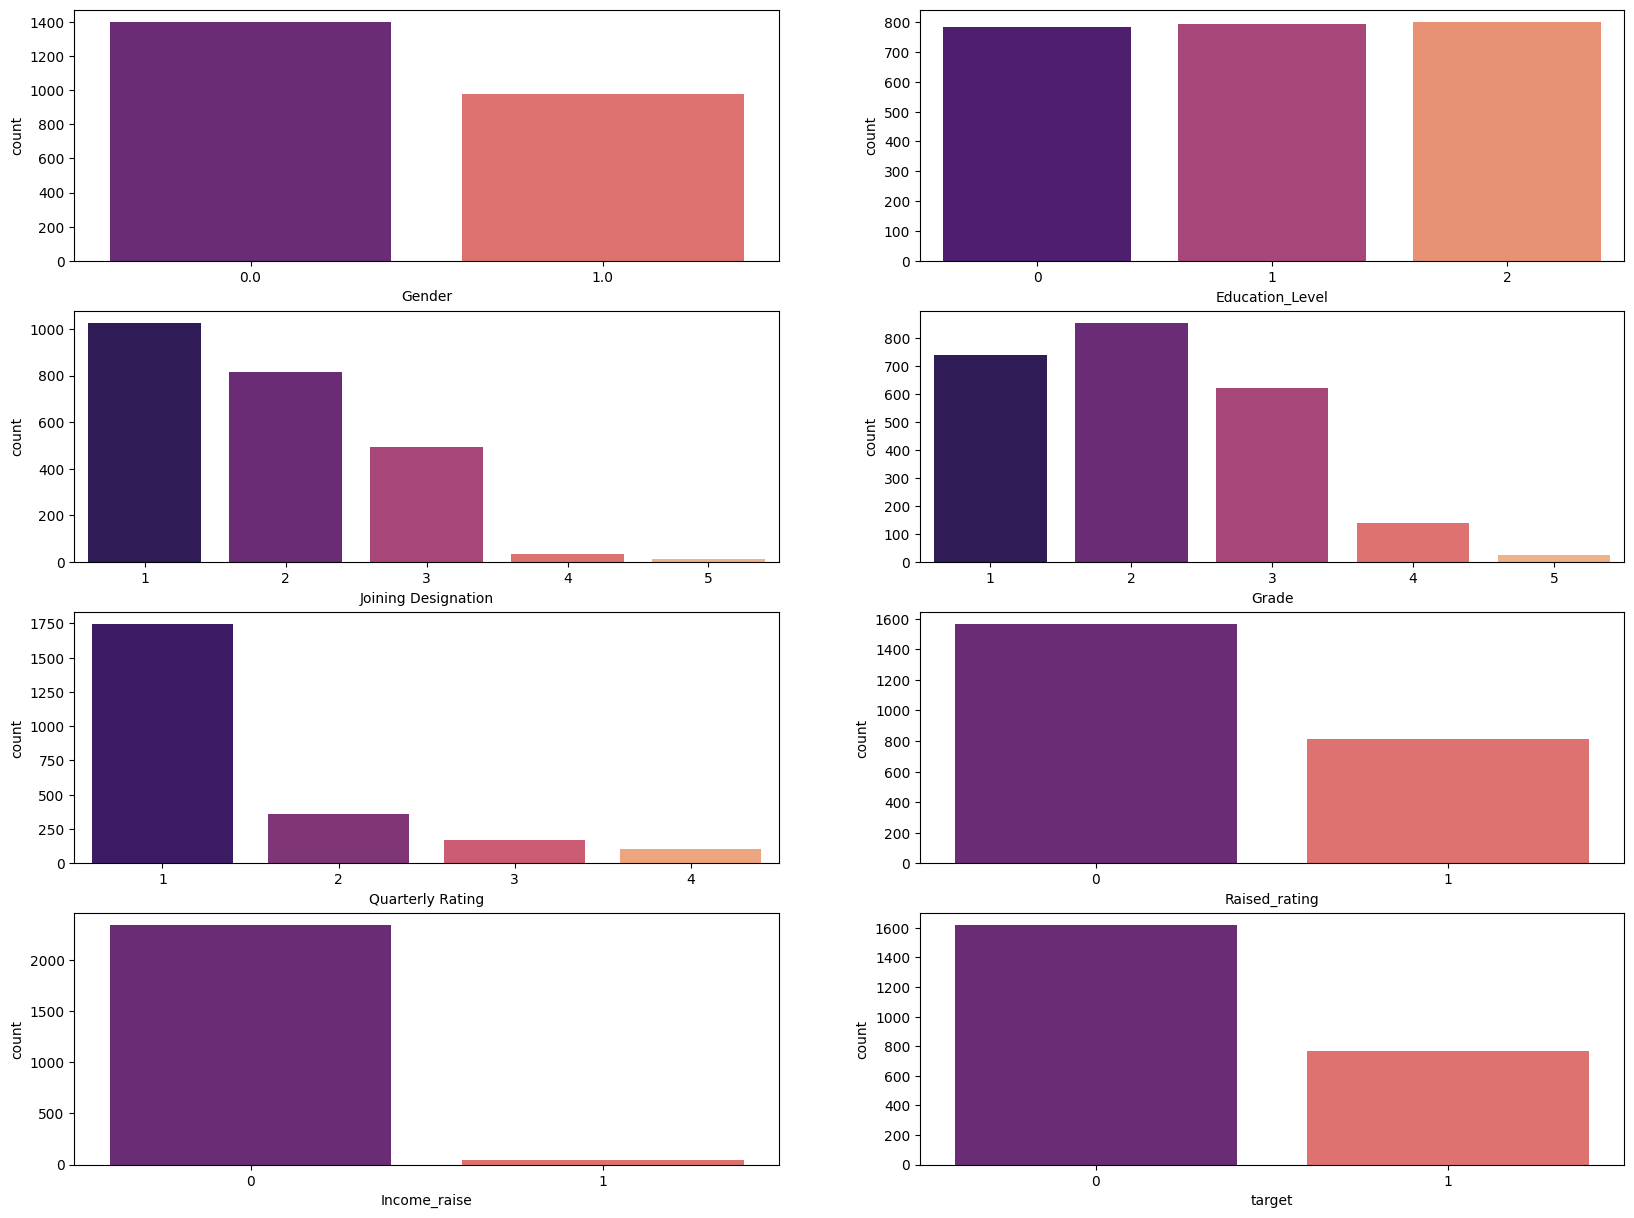

In [ ]:
cols = ['Gender', 'Education_Level', 'Joining Designation', 'Grade','Quarterly Rating','Raised_rating', 'Income_raise', 'target']
fig = plt.figure(figsize=(20,15))
i=1
for col in cols:
  ax = plt.subplot(4,2,i)
  sns.countplot(x=ola[col], palette='magma')
  i += 1


Insights:
- 58.9% of the drivers are male and 41.1% drivers are female.
- Majority drivers have recived joining designation 1.
- Most drivers have grade 2, followed by grade 1 and grade 3.
- 98.31% drivers have not received income raise since joining Ola.
- 65.5% drivers have not had their quarterly ratings raised since the beginning.
- Since joining, 67.8% drivers have left the company.

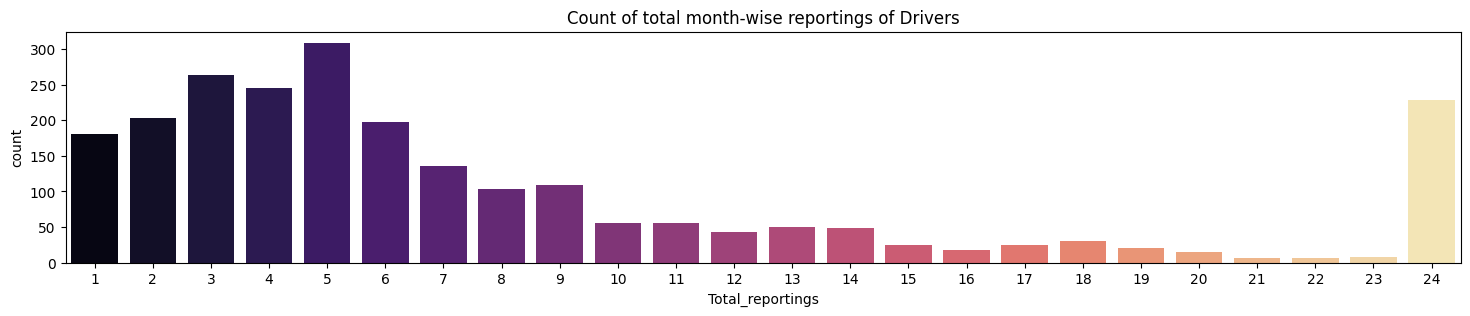

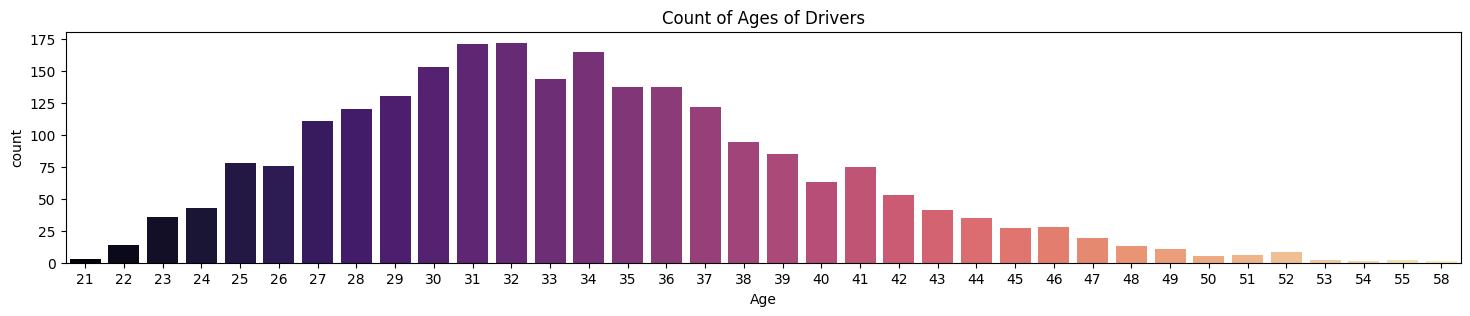

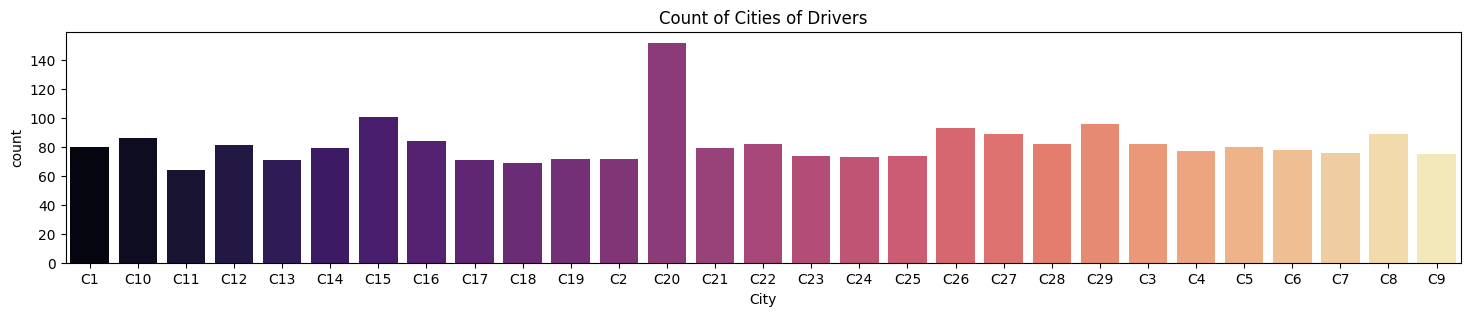

In [ ]:
fig = plt.figure(figsize=(18,3))
sns.countplot(x=ola['Total_reportings'], palette='magma')
plt.title(f'Count of total month-wise reportings of Drivers')

fig = plt.figure(figsize=(18,3))
sns.countplot(x=ola['Age'], palette='magma')
plt.title(f'Count of Ages of Drivers')

fig = plt.figure(figsize=(18,3))
sns.countplot(x=ola['City'], palette='magma')
plt.title(f'Count of Cities of Drivers')
plt.show()

Insights:
- Most drivers have reported to work for 5 times at the most, however there are some drivers who have reported about 24 times in total.
- Majority drivers lie between the ages of 26 to 35.
- C20 city has the most drivers.

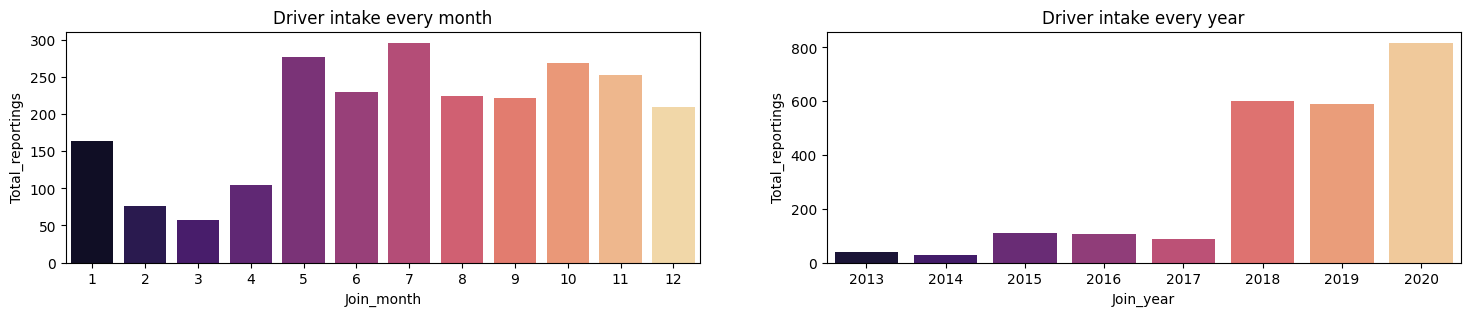

In [ ]:
plt.figure(figsize=(18,3))

ax = plt.subplot(1,2,1)
total_months = ola.groupby(['Join_month'])['Total_reportings'].count().reset_index()
sns.barplot(data=total_months,x='Join_month',y='Total_reportings',palette='magma')
plt.title('Driver intake every month')

ax = plt.subplot(1,2,2)
total_years = ola.groupby(['Join_year'])['Total_reportings'].count().reset_index()
sns.barplot(data=total_years, x='Join_year', y='Total_reportings', palette='magma')
plt.title('Driver intake every year')
plt.show()

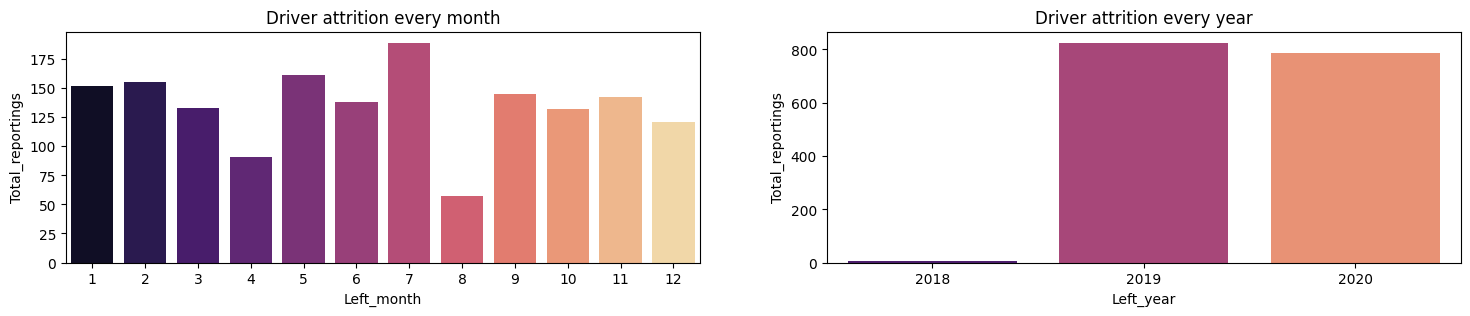

In [ ]:
plt.figure(figsize=(18,3))

ax = plt.subplot(1,2,1)
total_months = ola.groupby(['Left_month'])['Total_reportings'].count().reset_index()
sns.barplot(data=total_months,x='Left_month',y='Total_reportings',palette='magma')
plt.title('Driver attrition every month')

ax = plt.subplot(1,2,2)
total_years = ola.groupby(['Left_year'])['Total_reportings'].count().reset_index()
sns.barplot(data=total_years, x='Left_year', y='Total_reportings', palette='magma')
plt.title('Driver attrition every year')
plt.show()

Insights :
- July received the maximum number of drivers followed by month of May.
- February and March receives the least number of Drivers joining OLA.
- Joining of Drivers receives a boost from 2018 drastically.
- August had the least attrition of drivers and July had the most.
- Drivers have left in large numbers in the years 2019 and 2020.


Text(0.5, 1.0, 'Total Business Value')

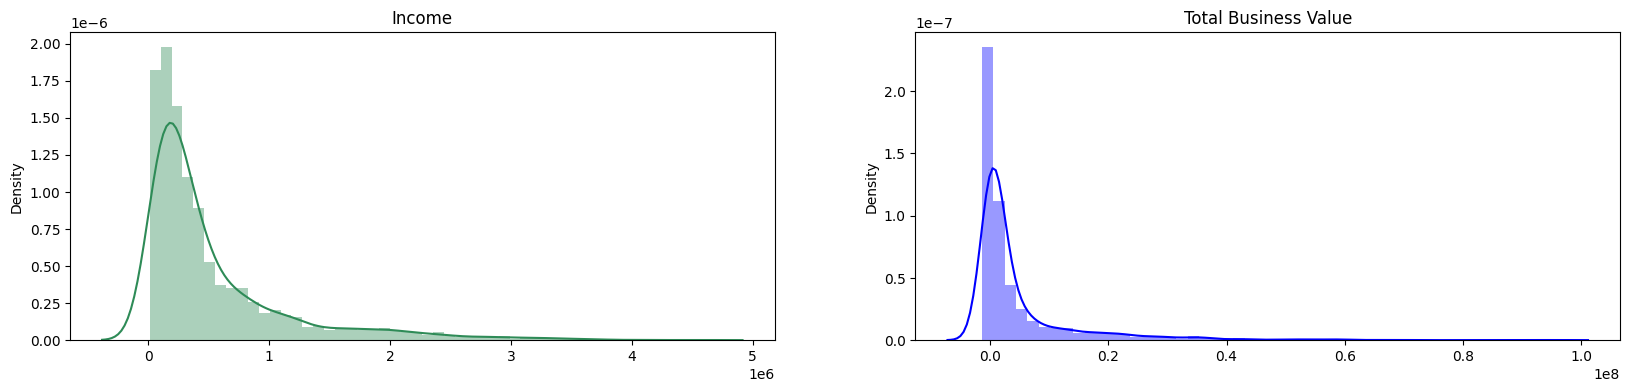

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(x=ola['Income'],color='seagreen')
plt.title('Income')

plt.subplot(122)
sns.distplot(x=ola['Total_value'],color='Blue')
plt.title('Total Business Value')

Insights:
- As we can observe the kde plots for Income and Total business value, the plots are highly skewed to the right and have many outliers.

INSIGHTS:

### Bivariate Analysis

In [ ]:
male_df = ola.loc[ola['Gender']==0.0]
female_df = ola.loc[ola['Gender']==1.0]

In [ ]:
male_df.head()

,Driver_ID,Total_reportings,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total_value,Quarterly Rating,Join_month,Join_year,Left_month,Left_year,target,Raised_rating,Income_raise
0,1,3,28,0.0,C23,2,172161,1,1,1715580,2,12,2018,3,2019,0,0,0
1,2,2,31,0.0,C7,2,134032,2,2,0,1,11,2020,<NA>,<NA>,1,0,0
2,4,5,43,0.0,C13,2,328015,2,2,350000,1,12,2019,4,2020,0,0,0
3,5,3,29,0.0,C9,0,139104,1,1,120360,1,1,2019,3,2019,0,0,0
5,8,3,34,0.0,C2,0,211968,3,3,0,1,9,2020,11,2020,0,0,0


<Axes: xlabel='Age', ylabel='count'>

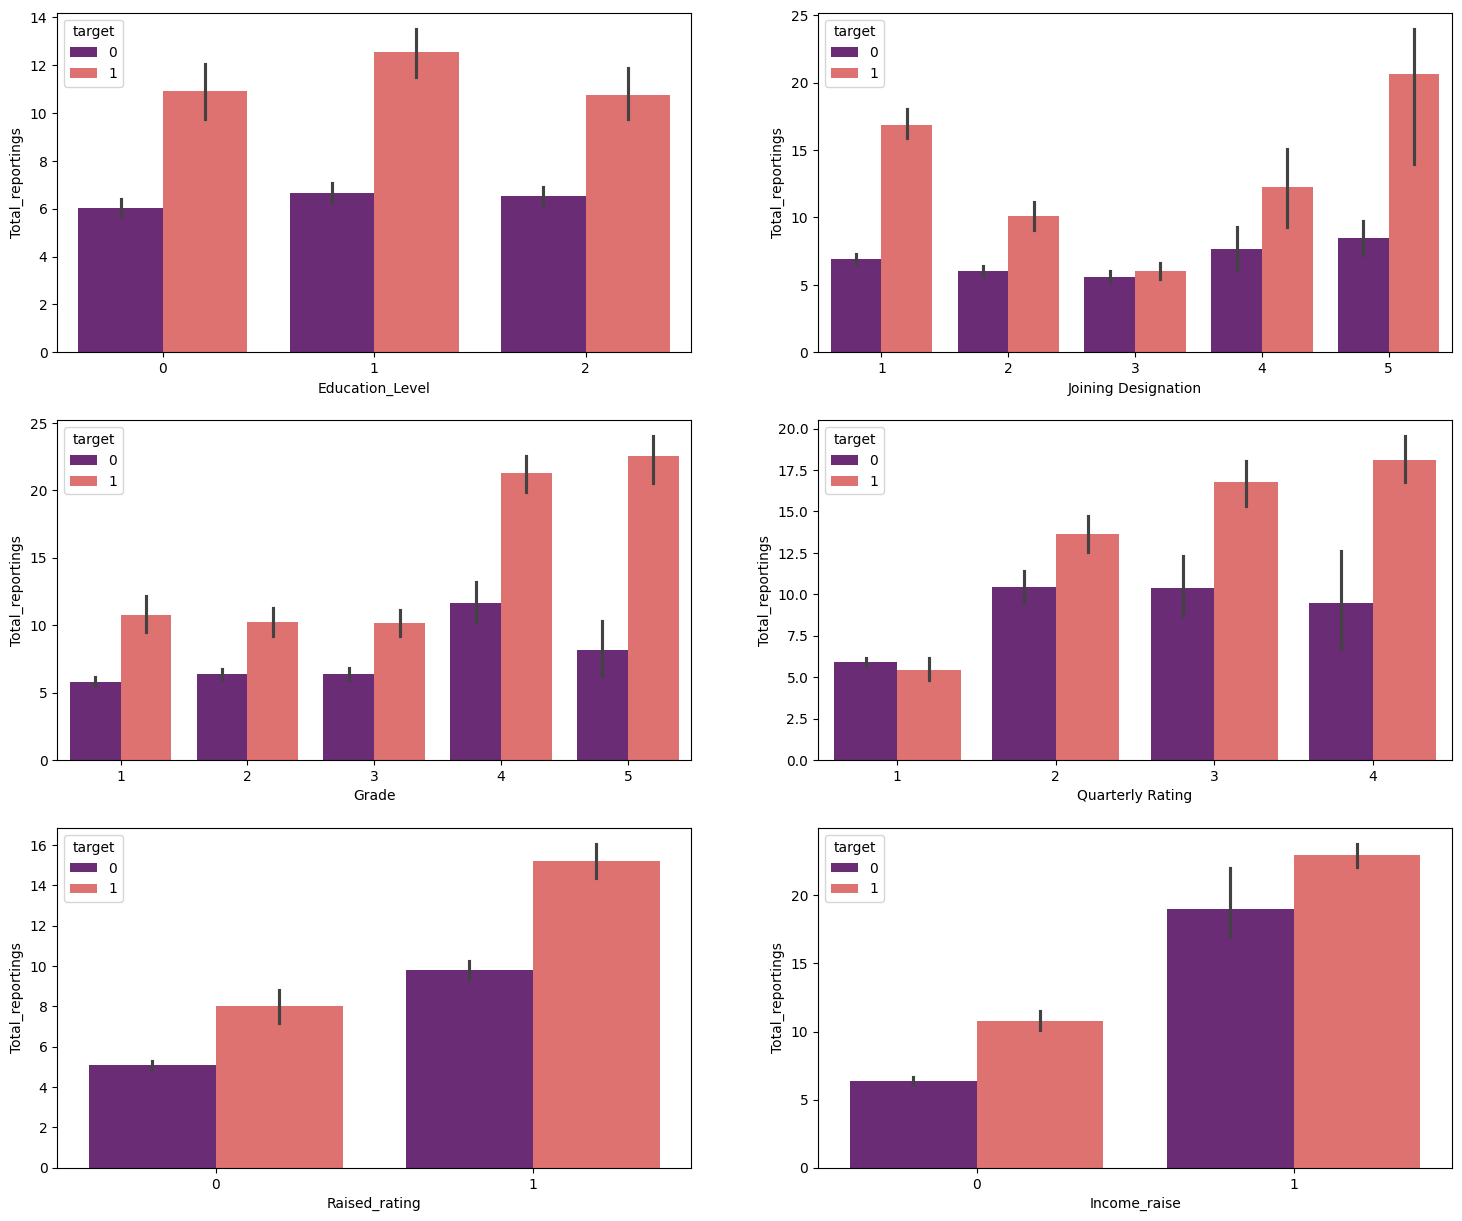

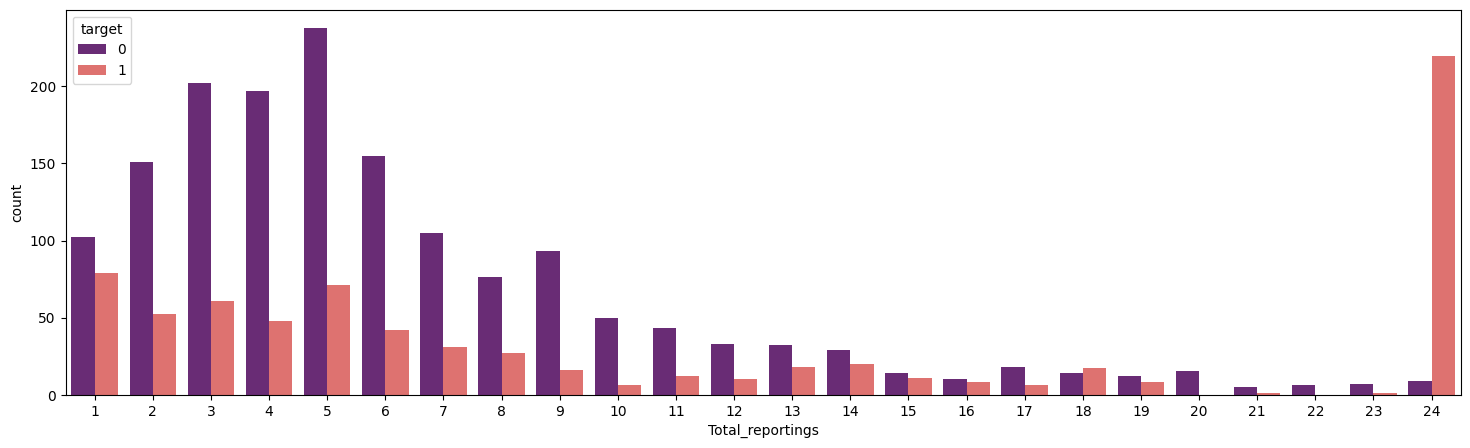

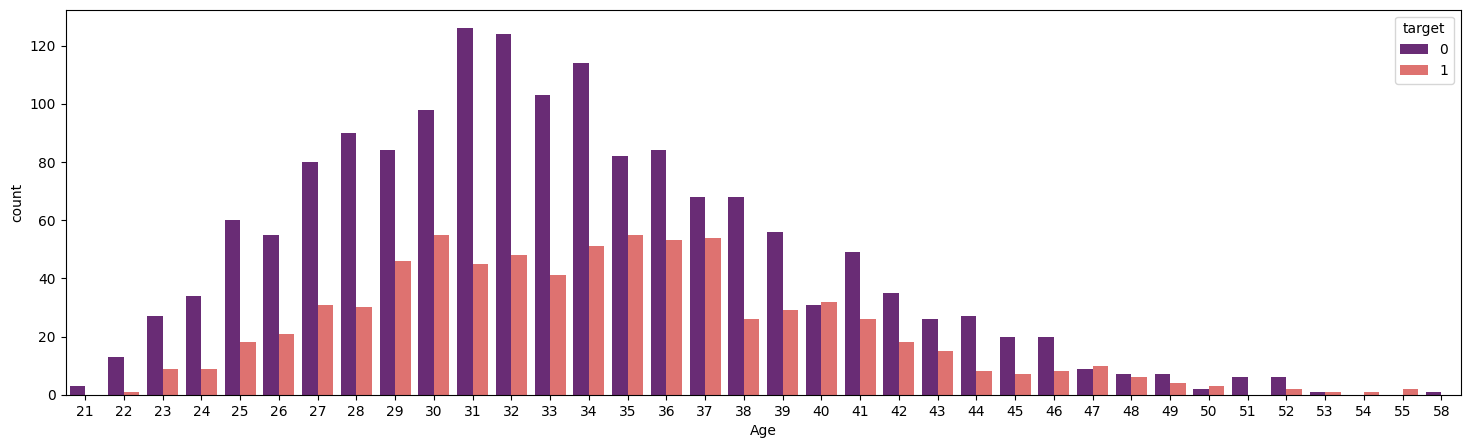

In [ ]:
cols = ['Education_Level','Joining Designation','Grade', 'Quarterly Rating', 'Raised_rating', 'Income_raise']
plt.figure(figsize=(18,15))
i=1
for col in cols:
  ax=plt.subplot(3,2,i)
  sns.barplot(x=ola[col], y=ola['Total_reportings'],hue=ola['target'],palette='magma')
  i+=1

plt.figure(figsize=(18,5))
sns.countplot(x=ola['Total_reportings'],hue=ola['target'],palette='magma')

plt.figure(figsize=(18,5))
sns.countplot(x=ola['Age'],hue=ola['target'],palette='magma')

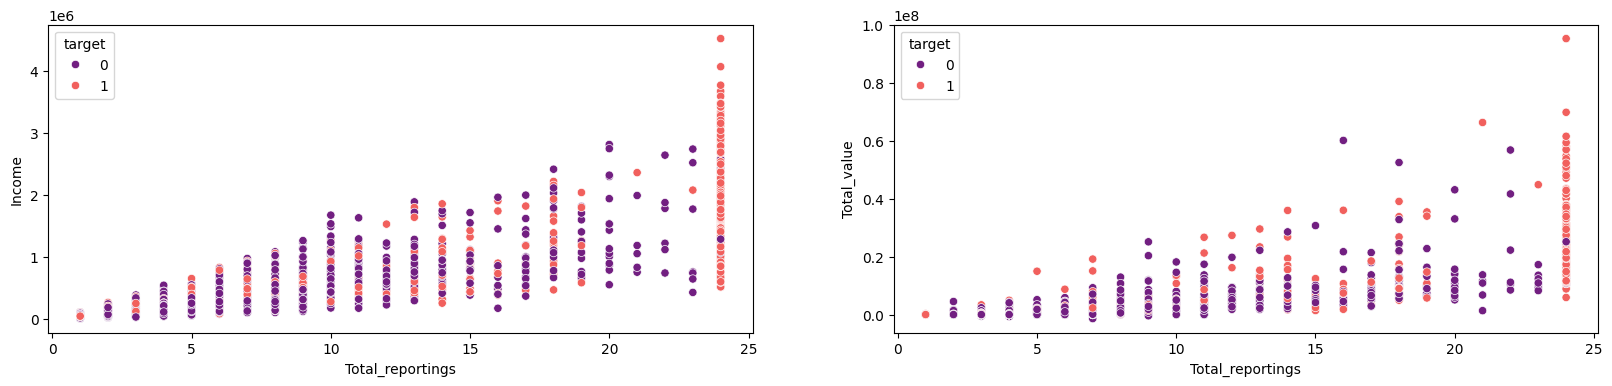

In [ ]:
plt.figure(figsize=(20,4))
cols=['Income','Total_value']
i=1
for col in cols:
  ax=plt.subplot(1,2,i)
  sns.scatterplot(x=ola['Total_reportings'], y=ola[col],hue=ola['target'],palette='magma')
  i+=1

Insights:
- Scatter plot of Income shows that Income increases with increase in reportings.
- Scatter plot of Total Business Value shows an increase with reportings, most employees have left after about 23 reportings

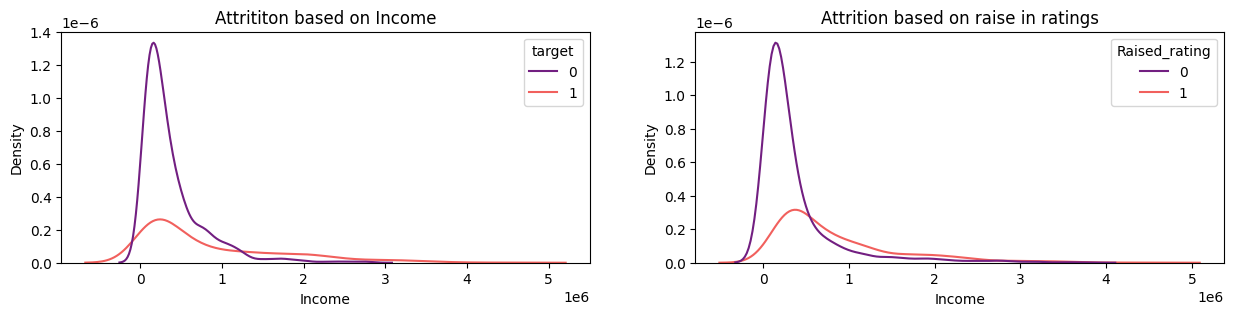

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(x=ola.Income,hue=ola['target'],palette='magma')
plt.title('Attrititon based on Income')
plt.subplot(1,2,2)
sns.kdeplot(x=ola.Income,hue=ola['Raised_rating'],palette='magma')
plt.title('Attrition based on raise in ratings')
plt.show()

Insights:
- We can observe from above plots that those who have received high income and a raise in ratings have stayed compared to others who have left.

### Outlier Detection and Treatment

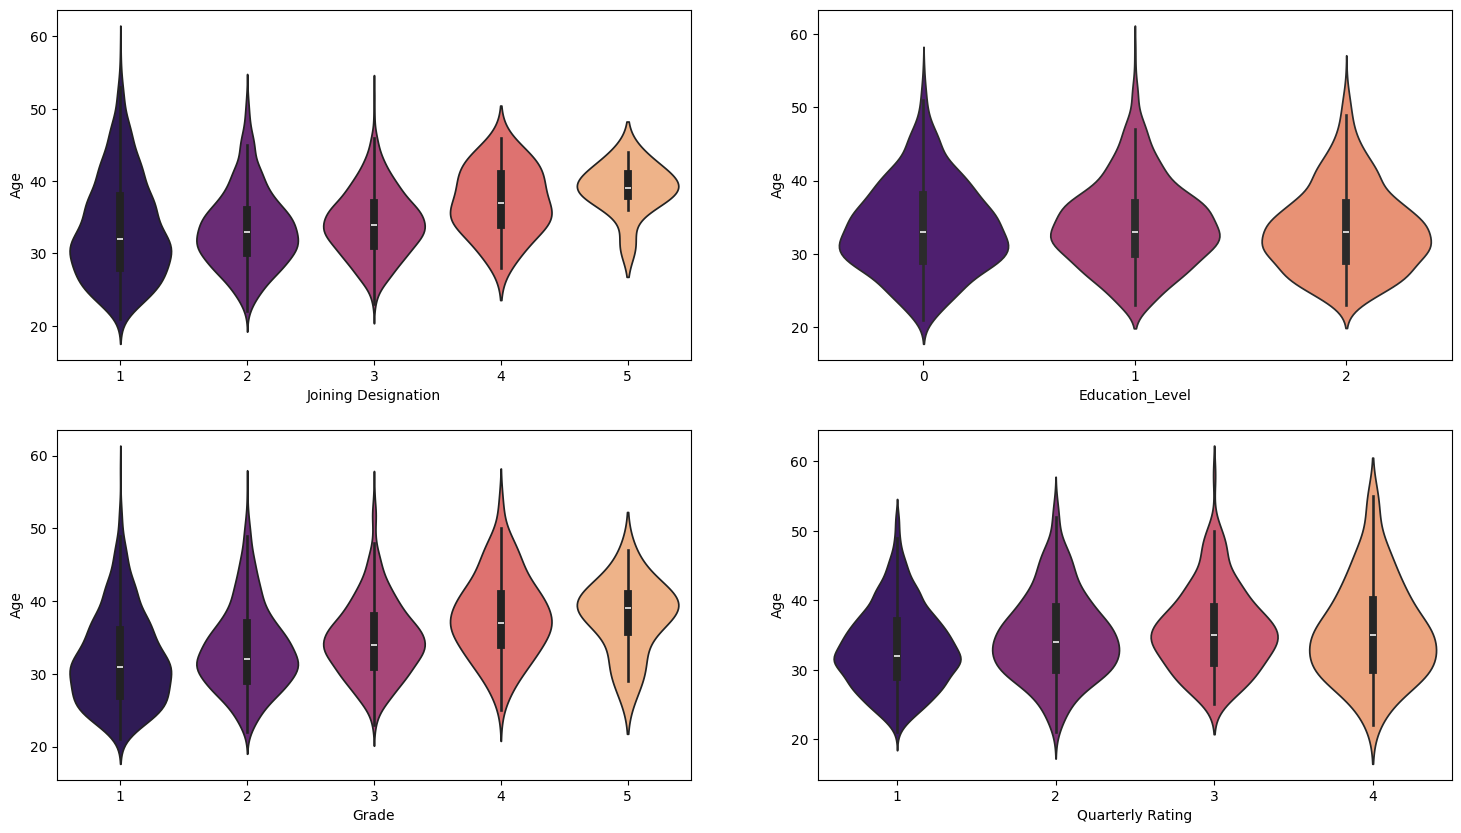

In [ ]:
cols=['Joining Designation', 'Education_Level', 'Grade','Quarterly Rating']
i=1
plt.figure(figsize=(18,10))
for col in cols:
  ax = plt.subplot(2,2,i)
  sns.violinplot(y=ola['Age'], x=ola[col], palette = 'magma')
  i+=1

<Figure size 1800x1000 with 0 Axes>

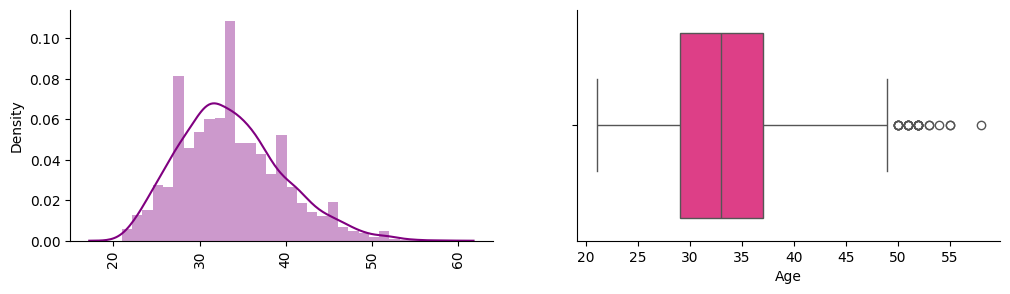

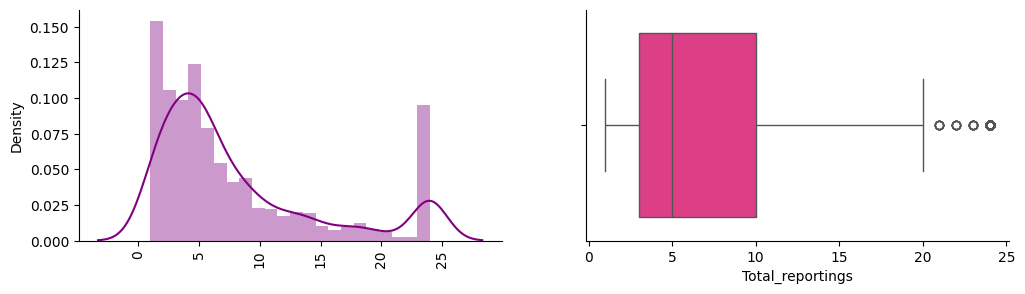

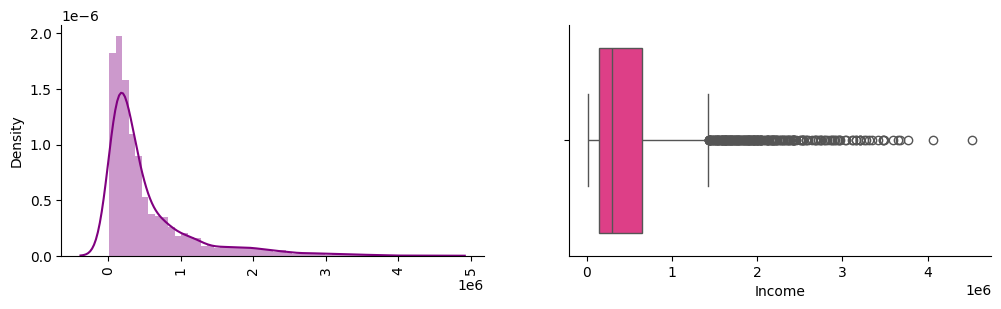

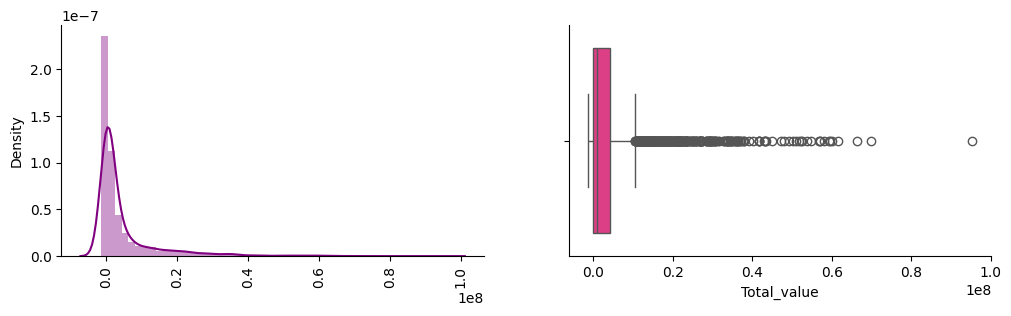

In [ ]:
cols=['Age','Total_reportings','Income','Total_value']
plt.figure(figsize=(18,10))
i=1
for col in cols:
  plt.figure(figsize=(12,3))
  plt.subplot(121)
  sns.distplot(x=ola[col],color='purple')
  plt.xticks(rotation=90)

  plt.subplot(122)
  sns.boxplot(x=ola[col],color='#F72585')
  sns.despine()
  plt.show()


Insights:
- From the above density and boxplots for numerical columns, we can observe that Income and Total Business Value have many outliers that can serously affect our machine learning models. As we can notice Total Business Value column has some values in negative too.


Hence, we wll use the Flooring and Capping method for treating the outliers.


<Figure size 1800x1000 with 0 Axes>

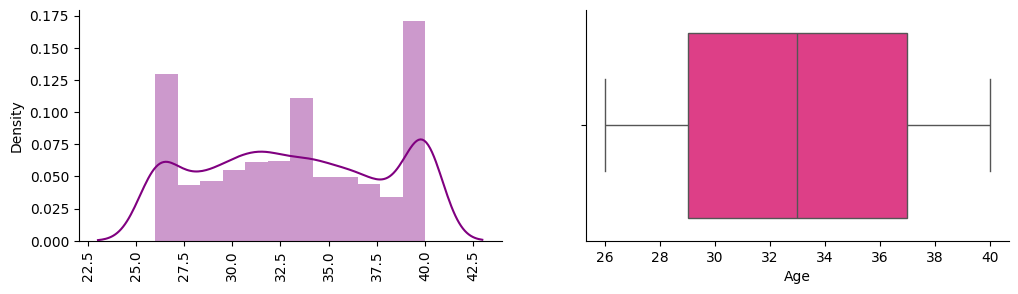

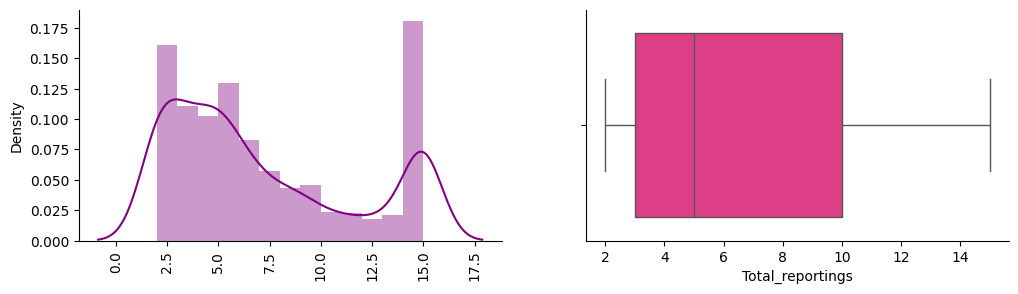

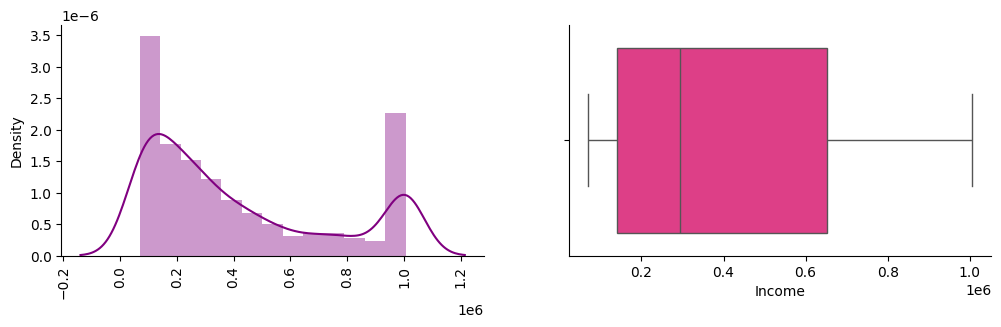

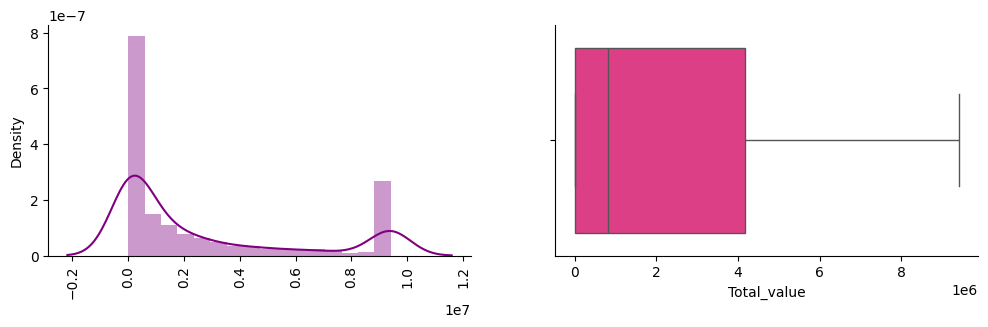

In [ ]:
cols=['Age','Total_reportings','Income','Total_value']
plt.figure(figsize=(18,10))
for col in cols:
  percentiles = ola[col].quantile([0.10, 0.85]).values
  ola[col] = np.clip(ola[col], percentiles[0], percentiles[1])
  plt.figure(figsize=(12,3))
  plt.subplot(121)
  sns.distplot(x=ola[col],color='purple')
  plt.xticks(rotation=90)

  plt.subplot(122)
  sns.boxplot(x=ola[col],color='#F72585')
  sns.despine()
  plt.show()


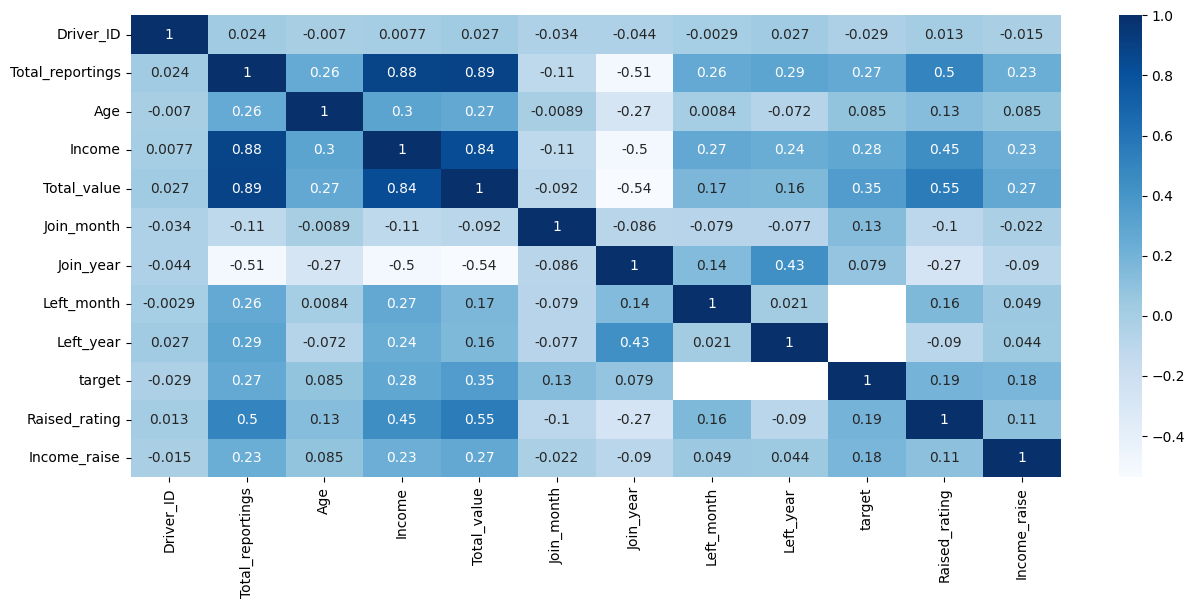

In [ ]:
corr = ola.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

### Ensemble Learning

In [ ]:
# Importing the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

#### Data preperation

In [ ]:
X = ola.drop(['Driver_ID', 'target','City','Left_month','Left_year'], axis=1)
y = ola['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 10, shuffle=True)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 13)
X_test Shape:  (477, 13)
y_train Shape:  (1904,)
y_test Shape:  (477,)


In [ ]:
X

array([[-0.89028736, -1.11991498, -0.8341876 , ..., -0.33327724,
        -0.72208431, -0.13561633],
       [-1.11052364, -0.47707082, -0.8341876 , ...,  0.90953107,
        -0.72208431, -0.13561633],
       [-0.4498148 ,  1.45146165, -0.8341876 , ...,  0.28812691,
        -0.72208431, -0.13561633],
       ...,
       [ 0.43113032,  1.45146165, -0.8341876 , ..., -0.33327724,
         1.38487983, -0.13561633],
       [-0.22957852, -1.11991498,  1.19877112, ..., -0.33327724,
         1.38487983, -0.13561633],
       [-0.00934224, -0.69135221, -0.8341876 , ...,  0.90953107,
         1.38487983, -0.13561633]])

#### RF model without balancing the data

In [ ]:
# Random Forest Classifier
params = {
    "max_depth": [3, 5, 7],
    "n_estimators": [10, 50, 100, 150]
}

rf = RandomForestClassifier()
c = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 7, 'n_estimators': 100}
Best Score:  0.8345677779509763


In [ ]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
proba = rf.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf.score(X_train, y_train))
print("Test data accuracy:",rf.score(X_test,y_test))
print('Model accuracy:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
cm = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9056603773584906
Model accuracy: 0.9056603773584906
ROC-AUC score test dataset:  0.964251809659428
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       318
           1       0.87      0.85      0.86       159

    accuracy                           0.91       477
   macro avg       0.90      0.89      0.89       477
weighted avg       0.91      0.91      0.91       477

----------------------------------------------------------------------
Confusion Matrix
[[297  21]
 [ 24 135]]


In [ ]:
rf.feature_importances_

array([0.11141958, 0.05717191, 0.01428695, 0.02640569, 0.10801836,
       0.03087358, 0.02919433, 0.11949862, 0.15042562, 0.13828521,
       0.19127818, 0.01726085, 0.00588111])

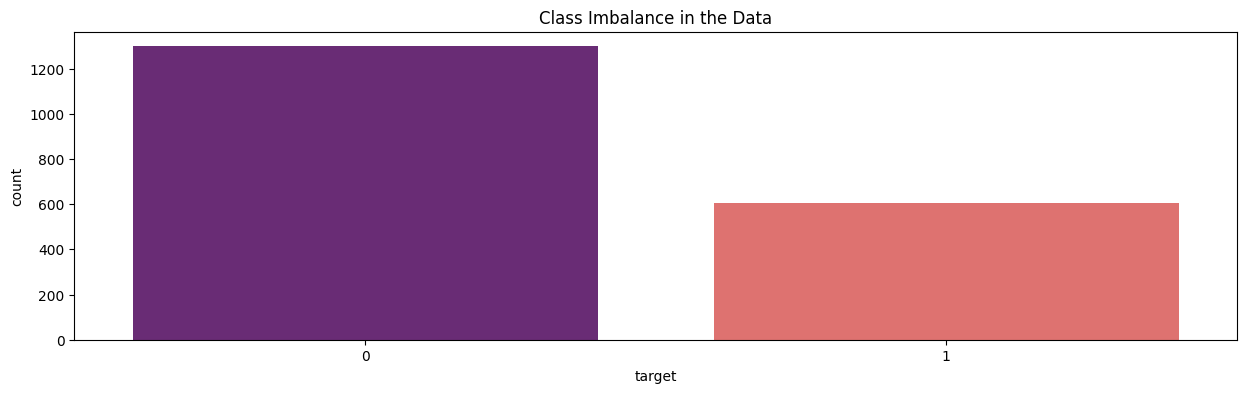

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='magma')
plt.title('Class Imbalance in the Data')
plt.show()

### Balancing the data using SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train.ravel())

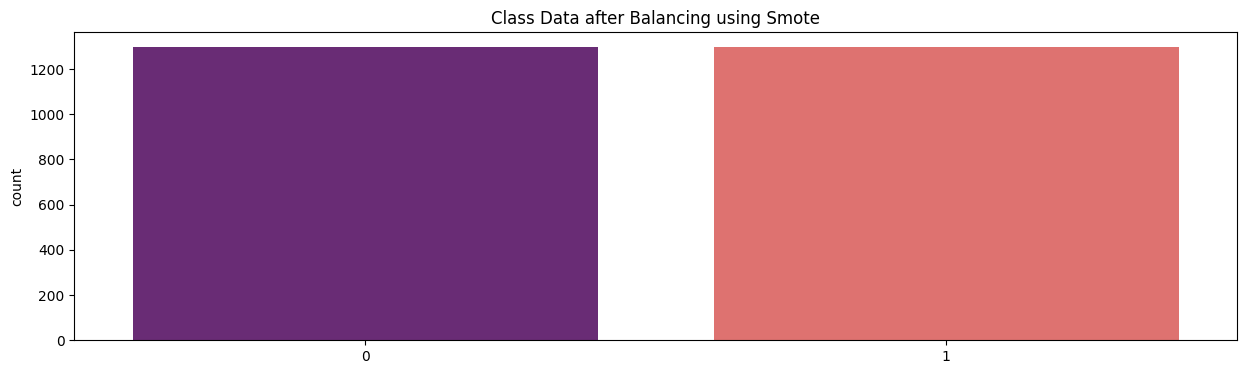

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train_smote,palette='magma')
plt.title('Class Data after Balancing using Smote')
plt.show()

### Random Forest Classifier

In [ ]:
params = {
    "max_depth": [3, 5, 7],
    "n_estimators": [10, 50, 100, 150],
}
rf1 = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=rf1, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')
c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 7, 'n_estimators': 50}
Best Score:  0.849834548234921


In [ ]:
rf1.fit(X_train_smote,y_train_smote)
y_pred = rf1.predict(X_test)
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
print('Confusion Metrix')
cm2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       318
           1       0.85      0.87      0.86       159

    accuracy                           0.90       477
   macro avg       0.89      0.89      0.89       477
weighted avg       0.90      0.90      0.90       477

----------------------------------------------------------------------
Confusion Metrix
[[293  25]
 [ 21 138]]


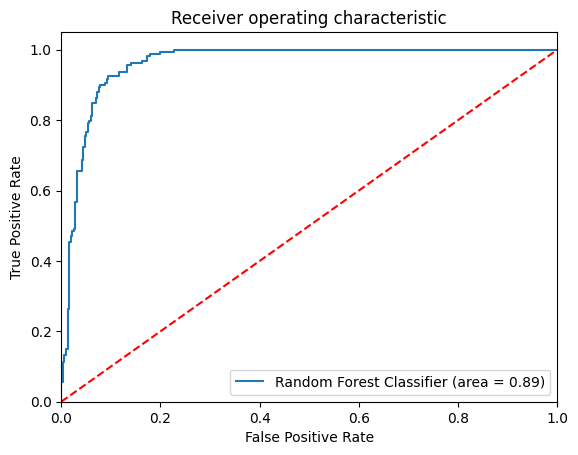

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50,100,150,200]
}

gbdt = GradientBoostingClassifier()
gbdt.fit(X_train_smote, y_train_smote)
y_pred = gbdt.predict(X_test)

print(classification_report(y_test, y_pred))
print('-'*60)
cm4 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm4)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       318
           1       0.83      0.90      0.86       159

    accuracy                           0.91       477
   macro avg       0.89      0.90      0.90       477
weighted avg       0.91      0.91      0.91       477

------------------------------------------------------------
Confusion Matrix
[[289  29]
 [ 16 143]]


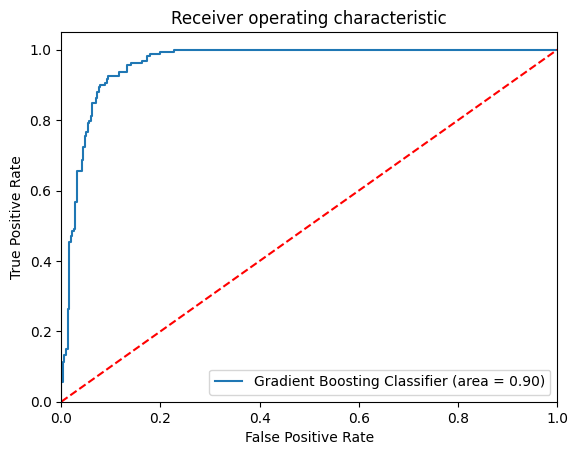

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### XGBoost Classifier

In [ ]:
model = XGBClassifier(class_weight = "balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Classifier Score: ", model.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

cm3 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm3)

XGBoost Classifier Score:  0.9056603773584906

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       318
           1       0.84      0.89      0.86       159

    accuracy                           0.91       477
   macro avg       0.89      0.90      0.90       477
weighted avg       0.91      0.91      0.91       477

Confusion Matrix
[[291  27]
 [ 18 141]]


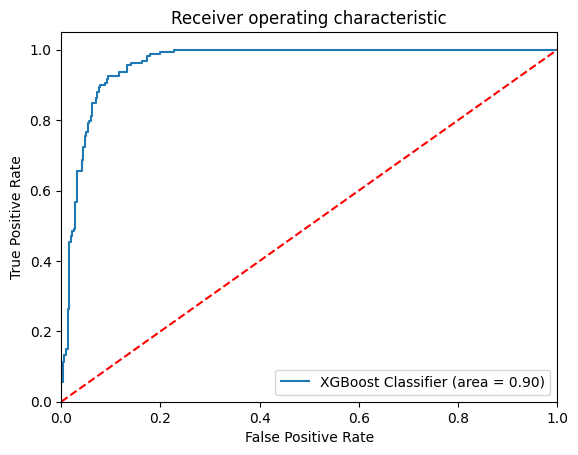

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# calculating precision, reall and f1_score for every
tp1,fp1,fn1,tn1 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp2,fp2,fn2,tn2 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp3,fp3,fn3,tn3 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 =(2*precision3*recall3)/(precision3+recall3)

In [ ]:
final_scores = pd.DataFrame({'Model':['RandomForest','XGBoost','GradientBoosting'],
                  'True_pos':[tp1,tp2,tp3],
                  'False_pos':[fp1,fp2,fp3],
                  'False_neg':[fn1,fn2,fn3],
                  'True_neg':[tn1,tn2,tn3],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100]})
final_scores

,Model,True_pos,False_pos,False_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,293,25,21,138,92.721519,92.138365,93.312102
1,XGBoost,291,27,18,141,92.822967,91.509434,94.174757
2,GradientBoosting,289,29,16,143,92.776886,90.880503,94.754098


### Final Insights and Recommendations:


### Insights
1. The employee demographic consists of 57% males and 43% females.
2. Nearly 43% of employees joined at the lowest designation (1), while 34% joined at level 2, 20% at level 3, and less than 2% at higher levels.
The majority (35%) of current employees hold designation level 2, followed by level 1 (31%) and level 3 (26%). Less than 5% occupy higher designations.
3. Only 54.6% of employees received a promotion, with 2.6% receiving a raise.
4. The number of employees and reportings has increased over the years.
5. Most employees seem to be based in city C20.
6. Similarly, the scatter plot of Total Business Value depicts an increase with age, followed by a decline after 45.
7. Income decreases with higher designations, as about 4% of employees hold such positions.
8. The more rides/reportings a driver has made, more is their income and more business value they have provided to the company.
9. The median income for employees with higher grades is higher.
10. Out of 2381 drivers, 1616 have departed from the company.
11. Of the 2381 employees, 1744 received a quarterly rating of 1 in their last assessment.
12. The Gradient Boosting Classifier achieves a 94% Recall score for drivers who left the company, indicating satisfactory model performance.
13. The XG Boost Classifier displays 92.82% F1 score.

### Recommendations
1. To address turnover, we must offer drivers incentives such as overtime pay or additional perks.
2. Employees who have experienced an increase in their quarterly ratings are less inclined to leave the organization.
3. The company should introduce a reward system for customers who provide feedback and rate drivers.
4. Employees whose monthly salaries have not increased are more inclined to leave the organization, necessitating intervention.
5. The company needs to reach out to drivers whose monthly salaries haven't increased and assist them in earning more through bonuses and perks.
6. Of the 2381 employees, 1744 received a quarterly rating of 1 in their last assessment.
7. For 2076 employees out of 2381, their quarterly ratings have not improved, signaling a concern that the company must address.
8. The company should investigate why customers aren't rating drivers.
9. Last_Quarterly_Rating, Total_Business_Value, and Quarterly_Rating_Increased are critical features that the company should monitor as predictors.